In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm_notebook as tq

In [3]:
df_train = pd.read_csv('Data/Train.csv')
df_test = pd.read_csv('Data/Test.csv')

In [4]:
df_train.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,...,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,...,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,...,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12632 entries, 0 to 12631
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12632 non-null  object 
 1   asset_id                 12632 non-null  int64  
 2   open                     8617 non-null   float64
 3   high                     8617 non-null   float64
 4   low                      8617 non-null   float64
 5   volume                   8605 non-null   float64
 6   market_cap               8379 non-null   float64
 7   url_shares               8575 non-null   float64
 8   unique_url_shares        8575 non-null   float64
 9   reddit_posts             12391 non-null  float64
 10  reddit_posts_score       12391 non-null  float64
 11  reddit_comments          12402 non-null  float64
 12  reddit_comments_score    12402 non-null  float64
 13  tweets                   8584 non-null   float64
 14  tweet_spam            

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6222 entries, 0 to 6221
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6222 non-null   object 
 1   asset_id                 6222 non-null   int64  
 2   open                     4304 non-null   float64
 3   high                     4304 non-null   float64
 4   low                      4304 non-null   float64
 5   volume                   4302 non-null   float64
 6   market_cap               4191 non-null   float64
 7   url_shares               4285 non-null   float64
 8   unique_url_shares        4285 non-null   float64
 9   reddit_posts             6122 non-null   float64
 10  reddit_posts_score       6122 non-null   float64
 11  reddit_comments          6109 non-null   float64
 12  reddit_comments_score    6109 non-null   float64
 13  tweets                   4289 non-null   float64
 14  tweet_spam              

### Missing values

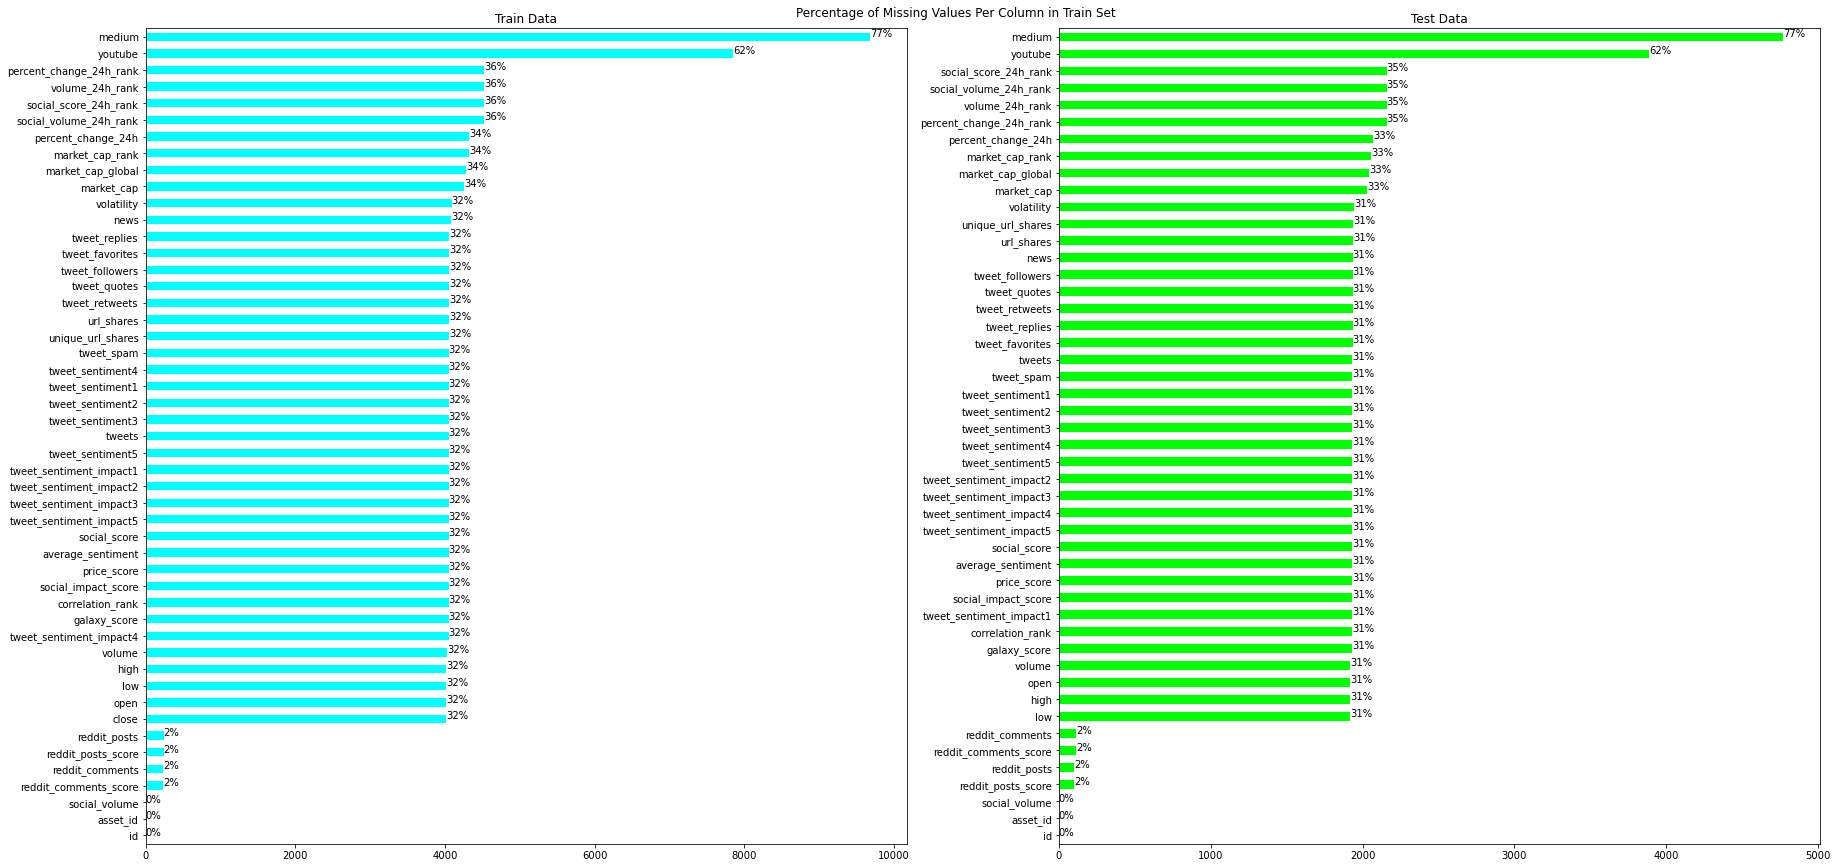

In [17]:
# Check if there any missing values in train set
fig, ax = plt.subplots(1,2, figsize = (30, 15))
fig.suptitle('Percentage of Missing Values Per Column in Train Set', y=0.90, fontdict={'size': 15})
# plotting training data
ax_0 = df_train.isna().sum().sort_values().plot(kind = 'barh', ax=ax[0], color='cyan')
ax[0].set_title('Train Data', fontdict={'size':12})

# plotting testing data
ax_1 = df_test.isna().sum().sort_values().plot(kind = 'barh', ax=ax[1], color='lime')
ax[1].set_title('Test Data', fontdict={'size':12})

# adding percentage to bars
for i in range(2):
    plot = eval('ax_'+str(i))
    data = [df_train, df_test]
    for p in plot.patches:
        percentage ='{:,.0f}%'.format((p.get_width()/data[i].shape[0])*100)
        width, height =p.get_width(),p.get_height()
        x=p.get_x()+width+0.02
        y=p.get_y()+height/2
        plot.annotate(percentage,(x,y))


From the above graph we can see that
* Our Target columns `close` has around 32% missing values
* `medium` and `youtube` columns have highest missing values of 77% and 62% respectively

### Skewness

#### Lets visualize the skewness of the data
> <img src="http://i.imgur.com/YSEYhha.jpg" width="600">

* Skewness tells the direction of outlier
* Left skewed means that it has a higher number of data points having high values and vise-versa, So when we train our model on this data, it will perform better at predicting the values with higher values as compared to lower valuse.
* Linear models work on the assumption that the distribution of the independent variable and the target variable are similar. Therefore, knowing about the skewness of data helps us in creating better linear models.

#### solution of skewness
It is better to transform the skewed data to normally distributed data. Here are some of the ways you can transform your skewed data:
* Power Transformation
* Log Transformation
* Exponential Transformation

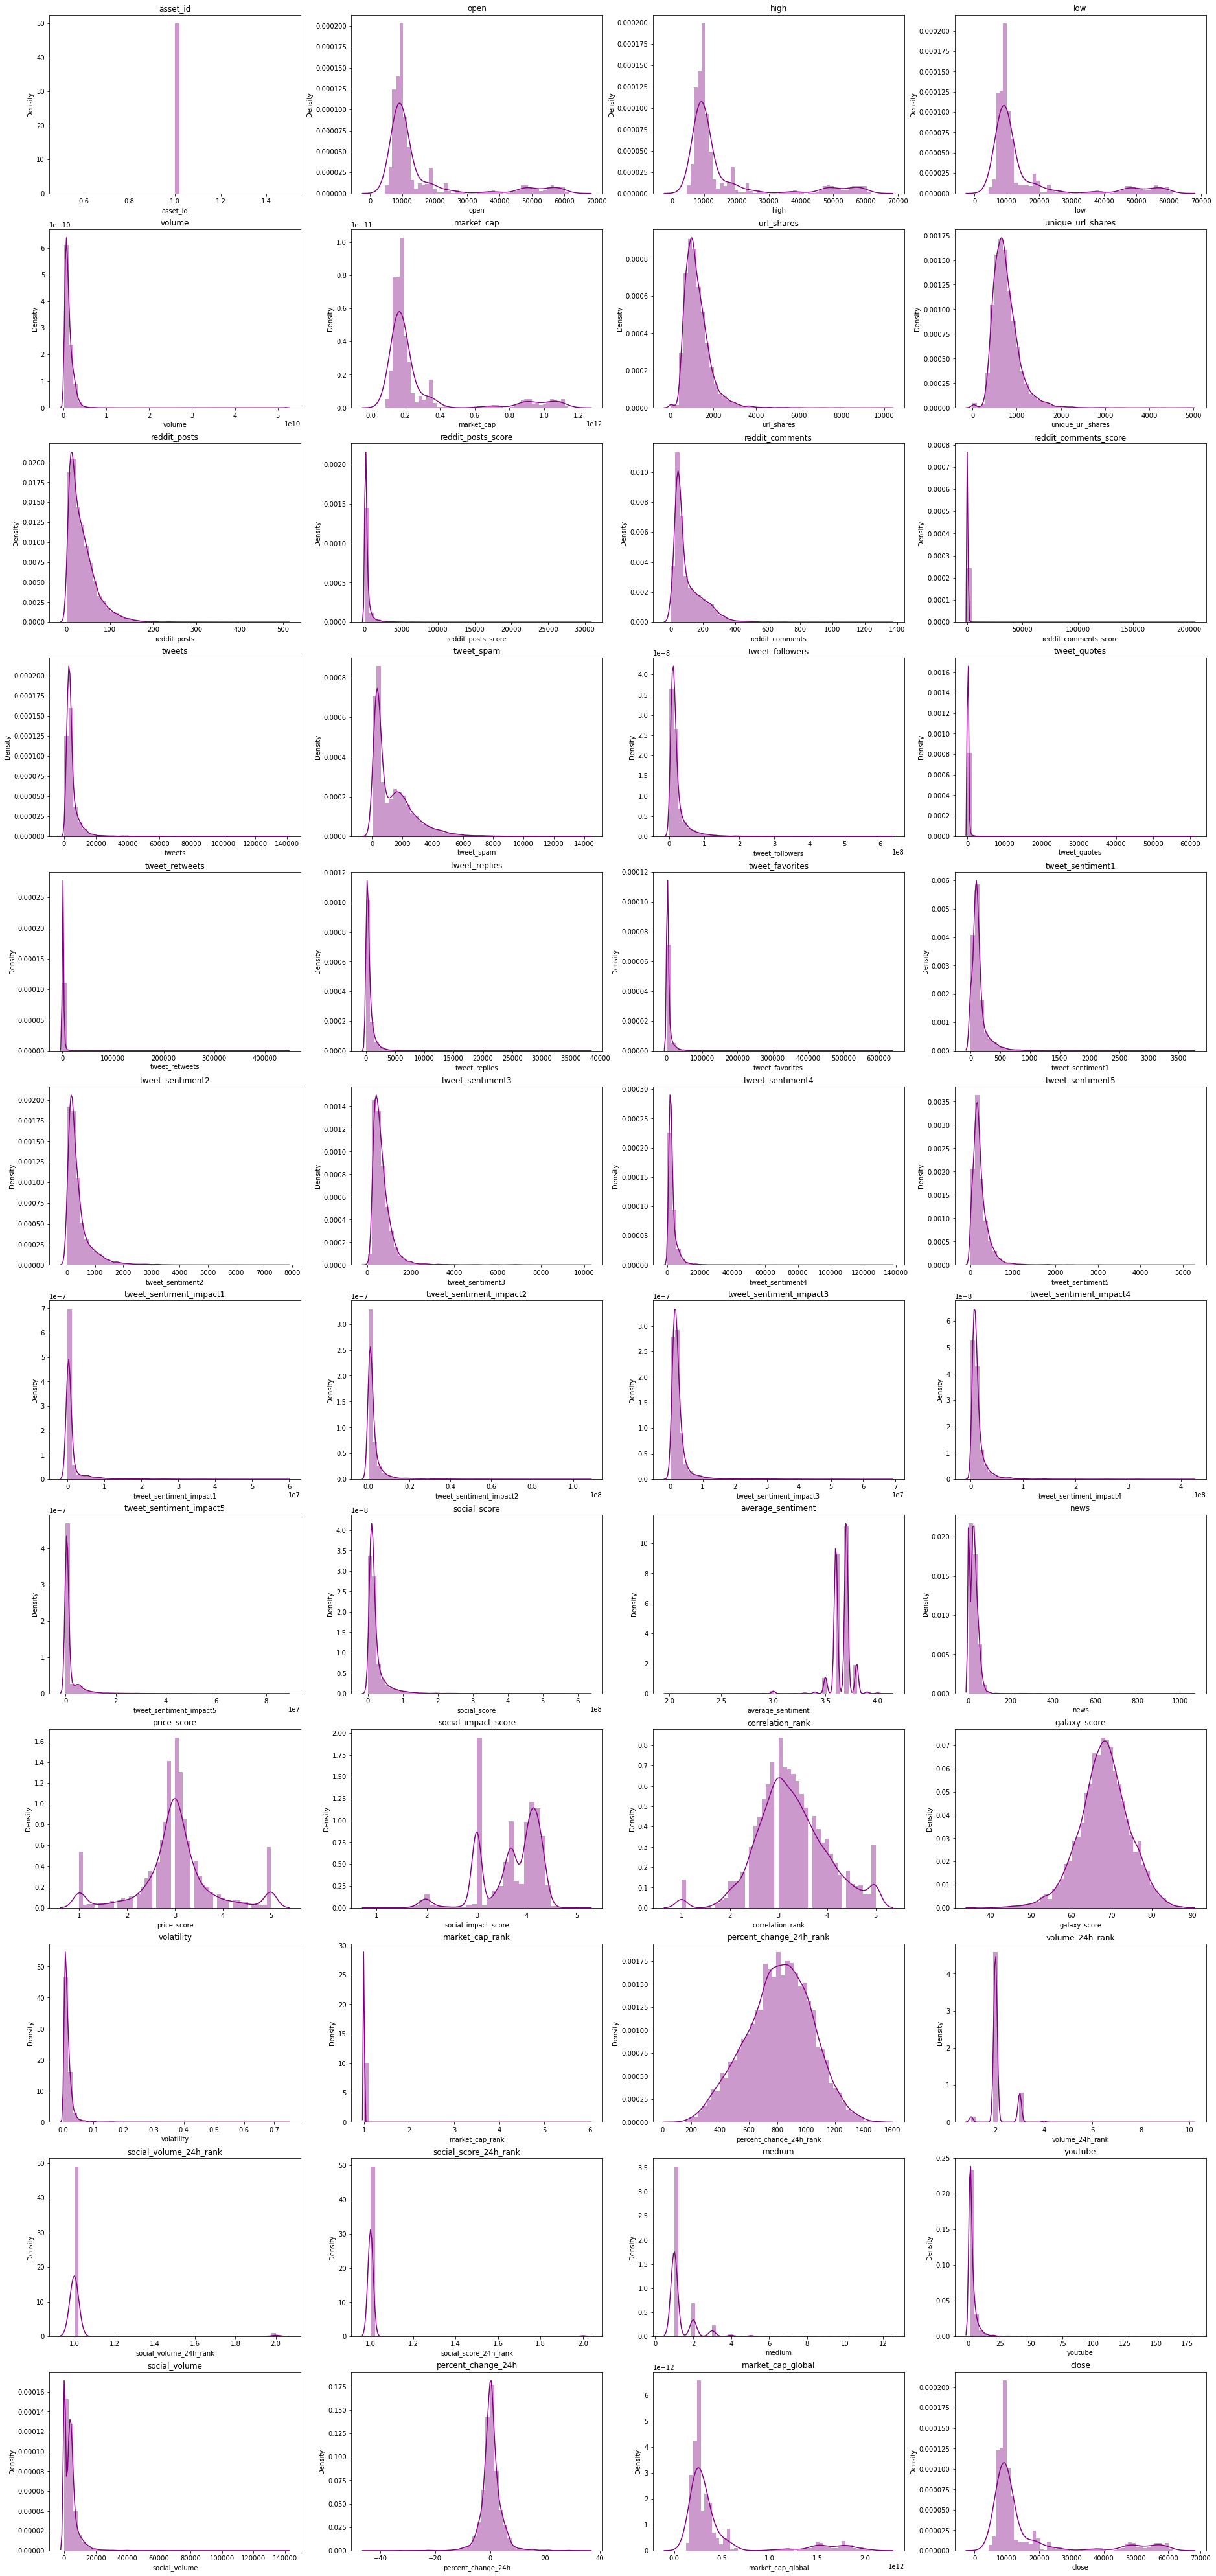

In [18]:
fig, ax = plt.subplots(12, 4, figsize=(32, 72))
col = 0
column = df_train.drop('id', axis=1).columns
for i in range(12):
    for j in range(4):
        sns.distplot(df_train[column[col]], color='purple', ax=ax[i][j])
        ax[i][j].set_title(*[column[col]])
        col+=1

From the above graph we can see that
* Almost all columns are left skewed means we have huge number of less values values
* Few columns such as `price_score`, `correlation_rank`, `galaxy_score`, `percent_change_24h_rank` and `percent_change_24h` are almost normally distributed.

### BoxPlot

#### Now lets see the box plot of each columns
> <img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" width="600">

Box plots tell us
* The value of the outliers
* Identify if the data is symmetrical
* Determine how tightly the data is grouped
* See if you data is skewed

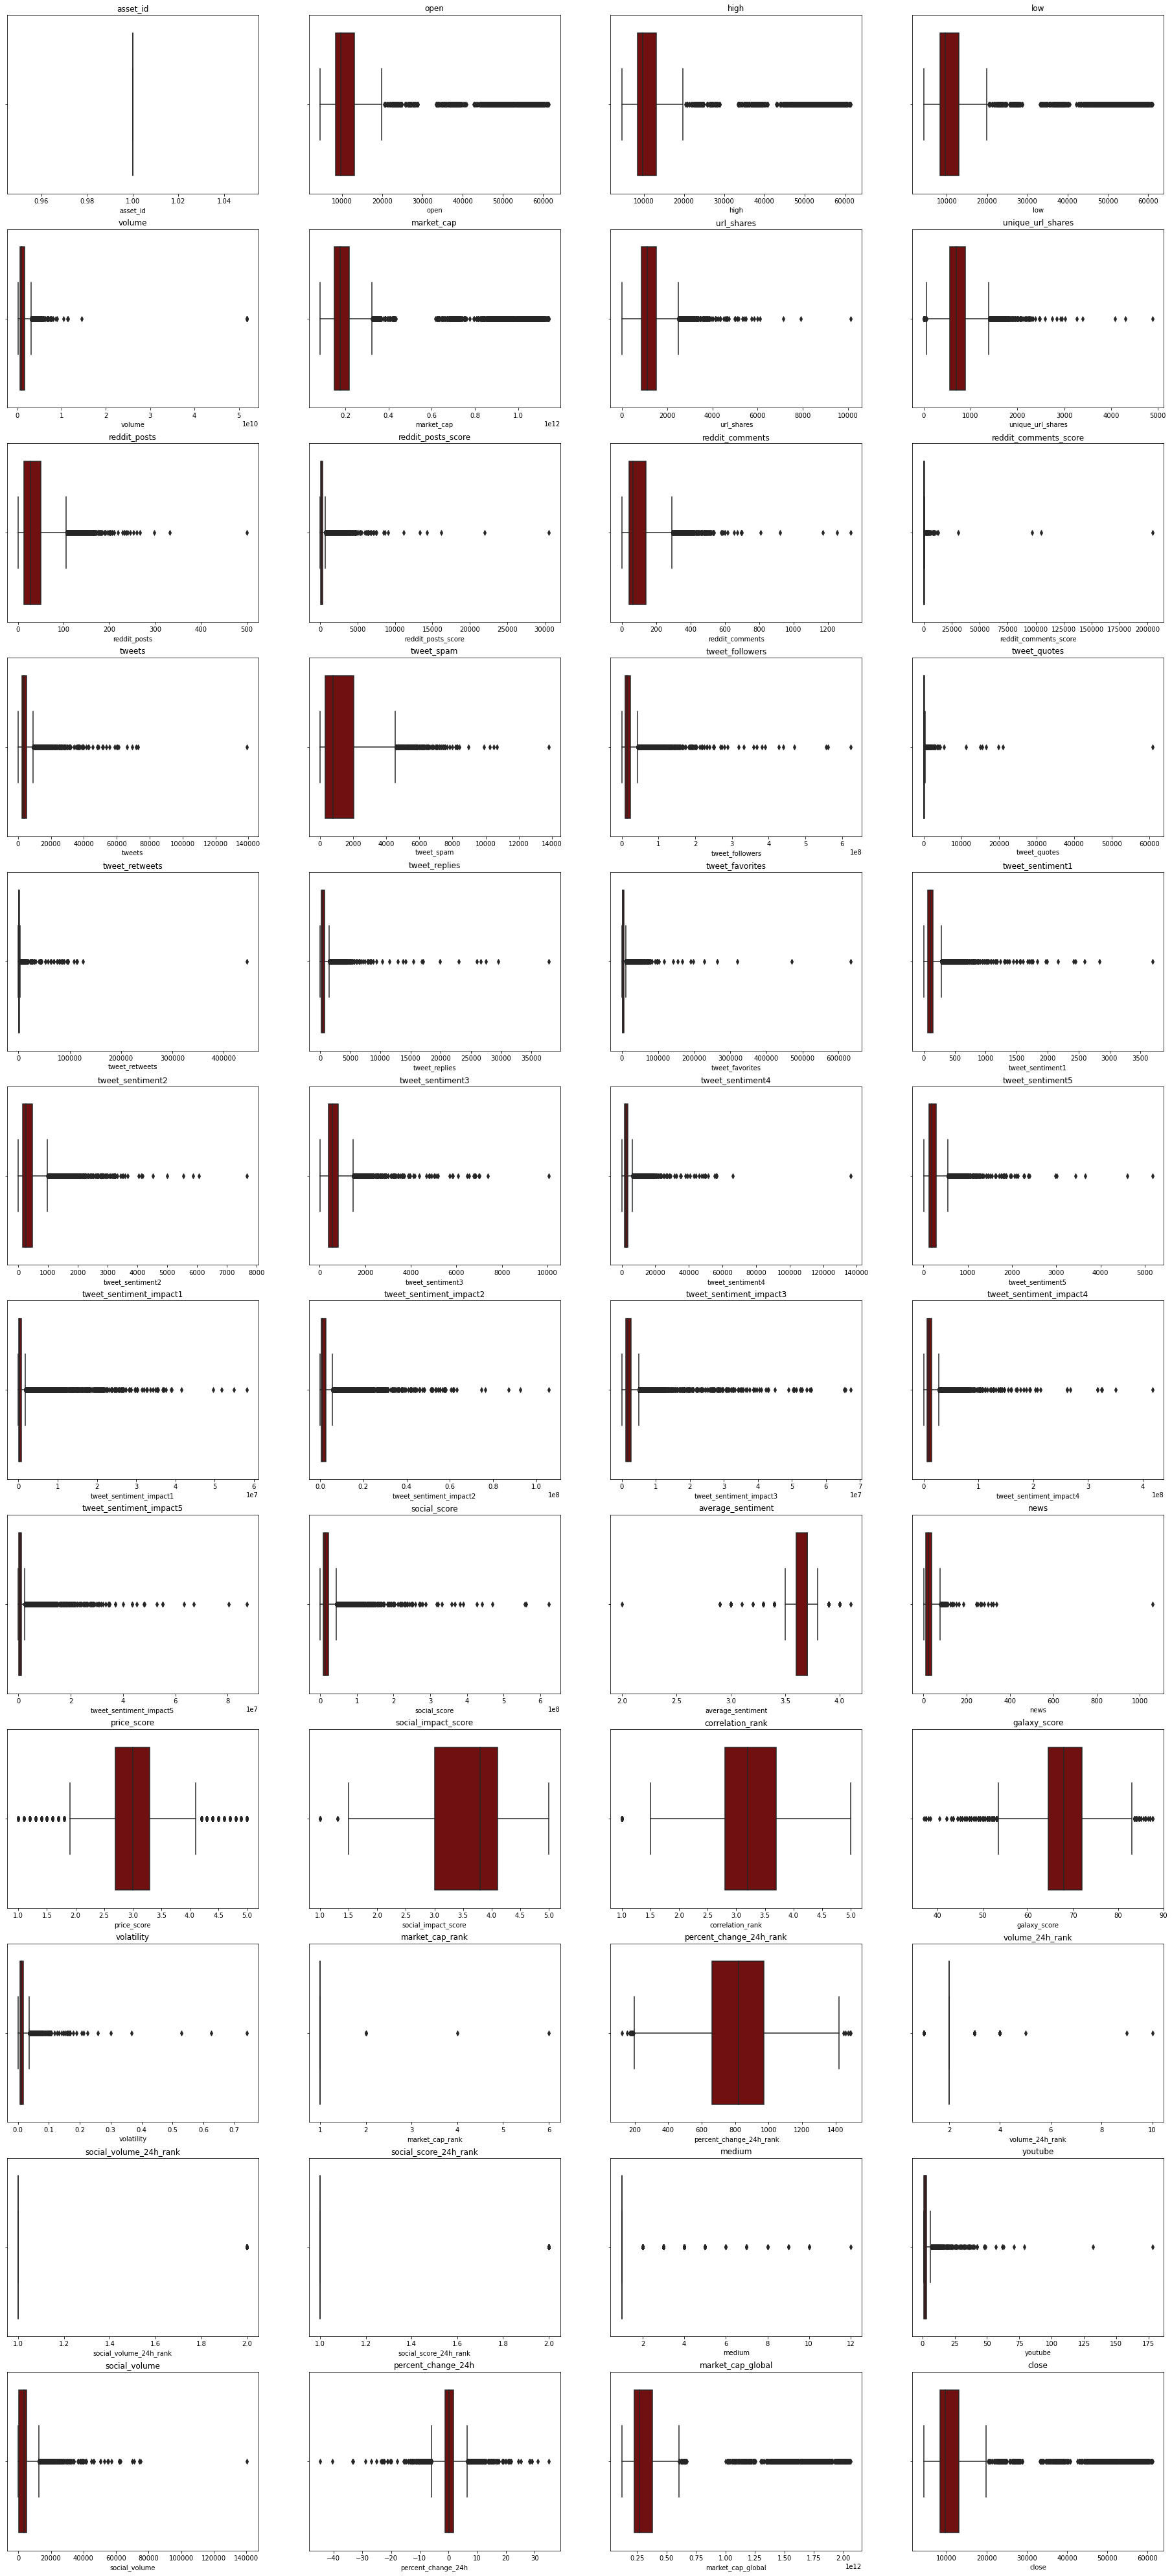

In [19]:
fig, ax = plt.subplots(12, 4, figsize=(32, 72))
col = 0
column = df_train.drop('id', axis=1).columns
for i in range(12):
    for j in range(4):
        sns.boxplot(df_train[column[col]], color='maroon', ax=ax[i][j])
        ax[i][j].set_title(*[column[col]])
        col+=1

As we can see 
* Almost all column is left skewed
* Almost all columns have bunch of outliers
* Some columns like `youtube`, `medium`, `social_score_24h_rank`, `social_volume_24h_rank` seems to have less outliers than rest, the reason could be high percent of null values persent in them


### Correlation

In [ ]:
features = df.drop(['id', 'asset_id', 'close'], axis=1)
label = df.close

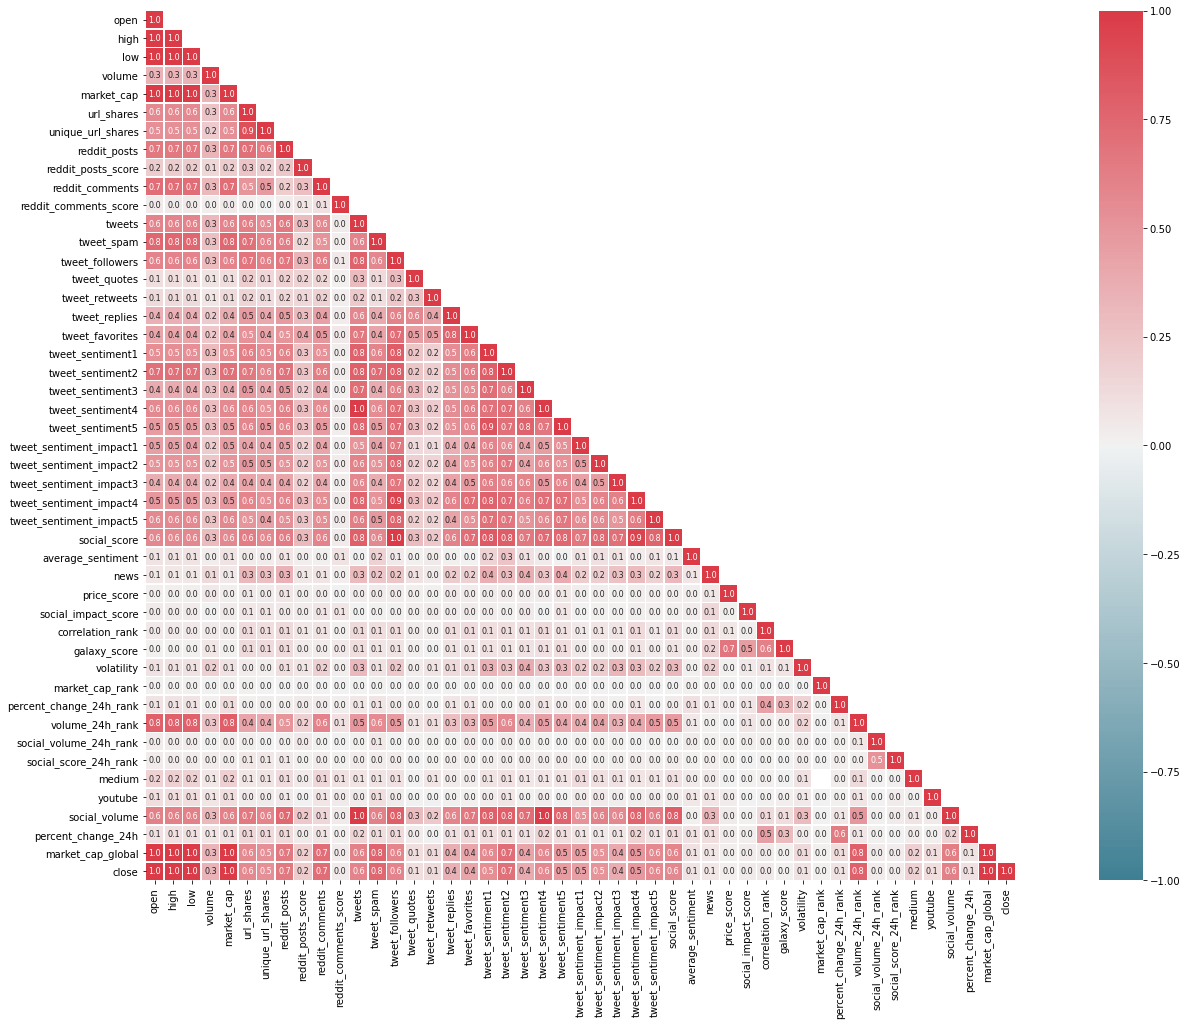

In [21]:
# Create correlation matrix
corr_matrix = df_train.drop(['id', 'asset_id'], axis=1).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(np.bool))

# plot
plt.figure(figsize=(30,16))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(upper, vmax=1, vmin=-1, center=0,
			linewidth=.5,square=True, annot = True,
            annot_kws = {'size':8},fmt='.1f', cmap=cmap)
plt.show()

Dataset have high multicollinearity

In [54]:
# higest correlated columns
df_corr = pd.read_csv('Data/Correlation.csv')
df_corr.sort_values(by='score', ascending=False)

,col1,col2,score
0,open,close,1.0
12,high,low,1.0
49,tweet_sentiment4,social_volume,1.0
34,tweet_followers,social_score,1.0
1,open,market_cap_global,1.0
27,tweets,tweet_sentiment4,1.0
23,tweets,social_volume,1.0
19,market_cap,market_cap_global,1.0
18,market_cap,close,1.0
17,low,market_cap,1.0


### Feature importance

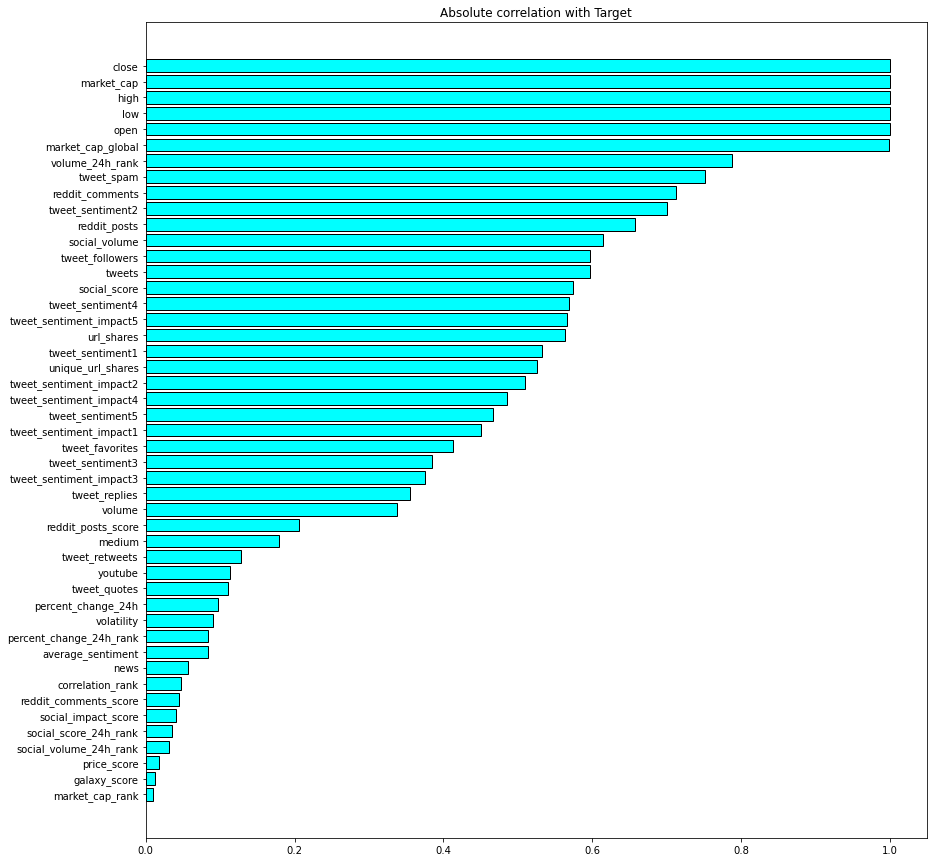

In [16]:
cor = df_train.drop(['id', 'asset_id'], axis=1).corr()
score = cor['close'].apply(np.abs).sort_values()

# columns highly correlate
plt.figure(figsize=(14,15))
plt.barh(score.index, score, color='cyan', edgecolor='black')
plt.title('Absolute correlation with Target')
plt.show()

In [17]:
# Top 15 Columns 
# According to linear correlation
cor_c = list(score.tail(15).index)
cor_c

['social_score',
 'tweets',
 'tweet_followers',
 'social_volume',
 'reddit_posts',
 'tweet_sentiment2',
 'reddit_comments',
 'tweet_spam',
 'volume_24h_rank',
 'market_cap_global',
 'open',
 'low',
 'high',
 'market_cap',
 'close']

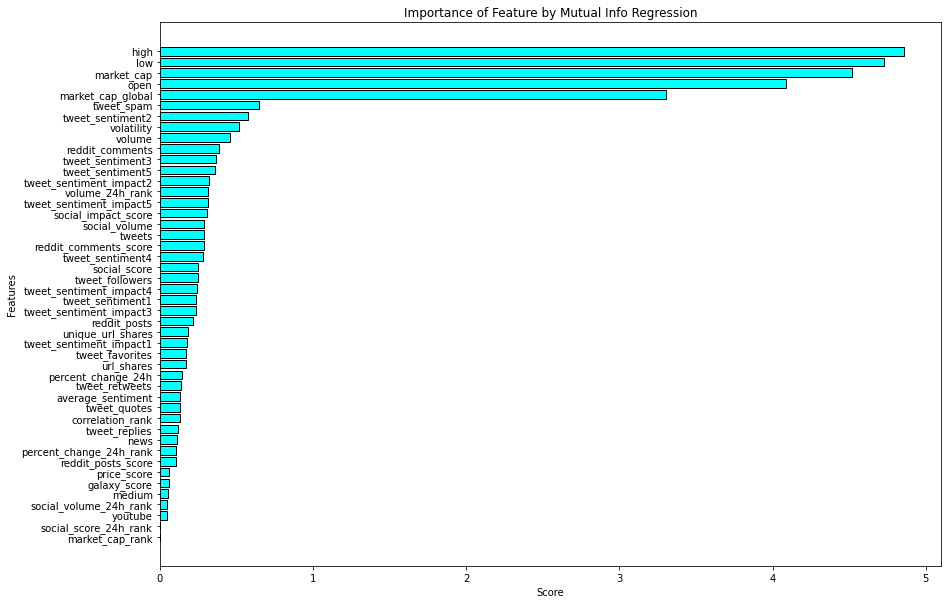

In [18]:
from sklearn.feature_selection import mutual_info_regression

# score of the dataset
df = df_train.dropna().copy()
features = df.drop(['id', 'asset_id', 'close'], axis=1)
label = df.close
score = mutual_info_regression(features, label)
temp = pd.DataFrame({'col': features.columns, 'score': score}).sort_values(by='score')

# lets plot it
plt.figure(figsize=(14, 10))
plt.barh(temp['col'], temp['score'], color = 'cyan', edgecolor='black')
plt.title('Importance of Feature by Mutual Info Regression')
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

In [19]:
# Top 15 Columns 
inf_c = list(temp.tail(15)['col'])
inf_c

['tweet_sentiment_impact5',
 'volume_24h_rank',
 'tweet_sentiment_impact2',
 'tweet_sentiment5',
 'tweet_sentiment3',
 'reddit_comments',
 'volume',
 'volatility',
 'tweet_sentiment2',
 'tweet_spam',
 'market_cap_global',
 'open',
 'market_cap',
 'low',
 'high']

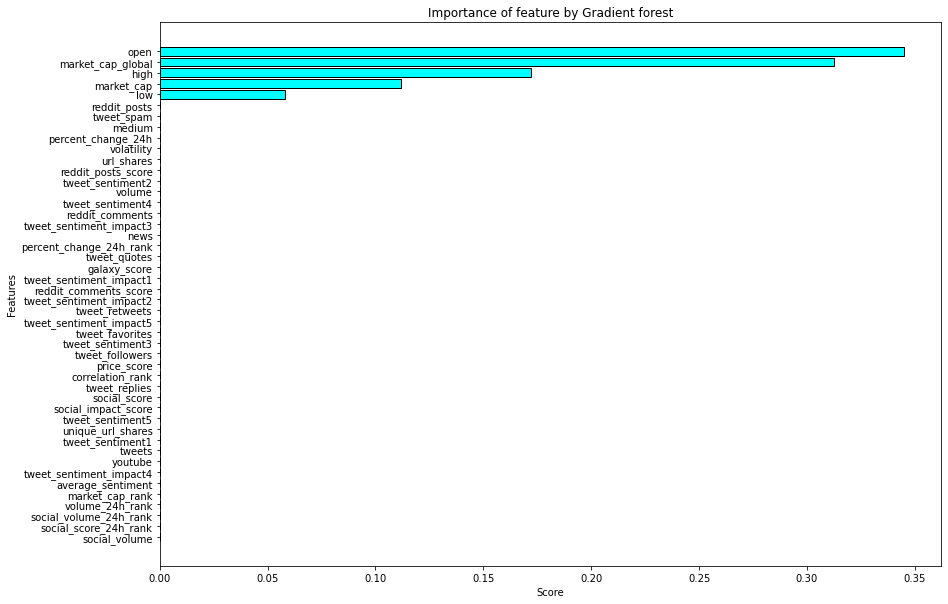

In [20]:
# lets try gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor().fit(features, label)
score = gb.feature_importances_

temp = pd.DataFrame({'col': features.columns, 'score': score}).sort_values(by='score')

# lets see the dropped column
plt.figure(figsize=(14,10))
plt.barh(temp['col'], temp['score'], color = 'cyan', edgecolor='black')
plt.title('Importance of feature by Gradient forest')
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

In [21]:
# Top 15 columns
gb_c = list(temp['col'].tail(15))
gb_c

['tweet_sentiment4',
 'volume',
 'tweet_sentiment2',
 'reddit_posts_score',
 'url_shares',
 'volatility',
 'percent_change_24h',
 'medium',
 'tweet_spam',
 'reddit_posts',
 'low',
 'market_cap',
 'high',
 'market_cap_global',
 'open']

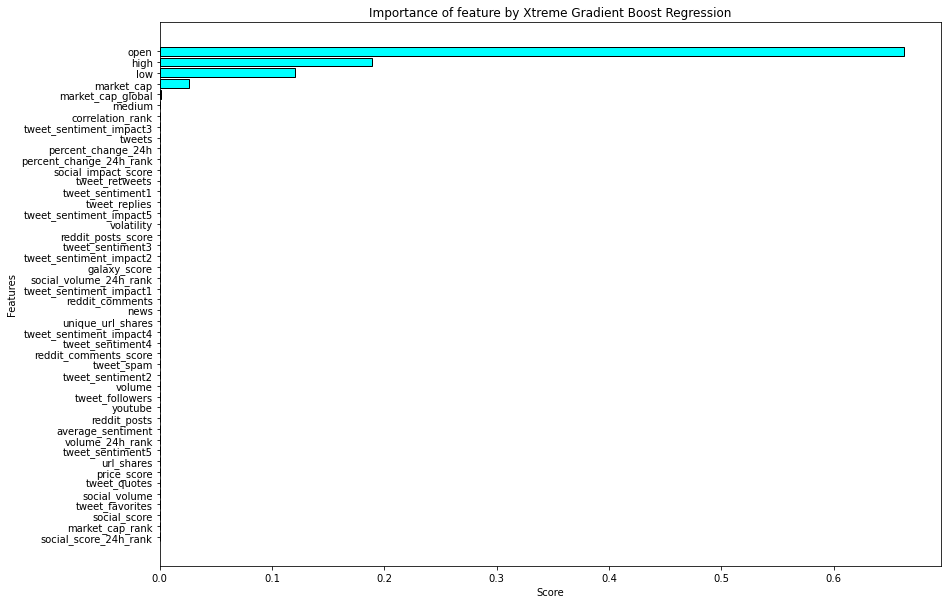

In [22]:
# lets try gradient boosting
from xgboost import XGBRegressor
gb = XGBRegressor().fit(features, label)
score = gb.feature_importances_

temp = pd.DataFrame({'col': features.columns, 'score': score}).sort_values(by='score')

# lets see the dropped column
plt.figure(figsize=(14,10))
plt.barh(temp['col'], temp['score'], color = 'cyan', edgecolor='black')
plt.title('Importance of feature by Xtreme Gradient Boost Regression')
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

In [23]:
# Top 15 columns
xgb_c = list(temp['col'].tail(15))
xgb_c

['tweet_replies',
 'tweet_sentiment1',
 'tweet_retweets',
 'social_impact_score',
 'percent_change_24h_rank',
 'percent_change_24h',
 'tweets',
 'tweet_sentiment_impact3',
 'correlation_rank',
 'medium',
 'market_cap_global',
 'market_cap',
 'low',
 'high',
 'open']

In [34]:
# overall Top 10 columns by
top15_all = cor_c+inf_c+gb_c+xgb_c
top10 = {x: top15_all.count(x) for x in set(top15_all)}
top10_ = dict(sorted(top10.items(), key=lambda x: x[1], reverse=True))
top_col = [x for x in set(top15_all) if top15_all.count(x) >= 2]

In [36]:
len(top_col)

15

In [ ]:
'tweet_spam', 'market_cap_global', 'high', 'open', 'market_cap', 'low', 'tweet_sentiment2'